In [1]:
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns

In [2]:
TB_SA = pd.read_csv('data/tb_sa.csv')

In [3]:
# Tamanho default das figuras
matplotlib.rcParams['figure.figsize'] = (15.0, 9.0)
plt.style.use('seaborn-colorblind')
plt.ion()

In [4]:
def getDataByXHab(data, column, X=100000):
  return data[column]/data['e_pop_num']*X

### Segunda pergunta: A quantidade de pessoas infectadas com HIV afeta a quantidade de óbitos por Tuberculose?

Hipótese nula: A quantidade de pessoas infectadas com HIV afeta a quantidade de óbitos

Hipótese alternativa: A quantidade de pessoas infectadas com HIV afeta a quantidade de óbitos

Para validar a hipótese nula, procuraremos encontrar através de regressão linear uma tendência crescente significativa entre a comorbidade e quantidade de óbitos.

In [5]:
plot_data = TB_SA[['e_inc_tbhiv_num', 'e_inc_num', 'e_mort_num', 'e_pop_num']].copy()

plot_data['e_inc_tbhiv_num'] = getDataByXHab(plot_data, 'e_inc_tbhiv_num')
plot_data['e_mort_num'] = getDataByXHab(plot_data, 'e_mort_num')

X = plot_data['e_inc_tbhiv_num'].values.reshape(-1,1)
y = plot_data['e_mort_num'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lin_regr = linear_model.LinearRegression()
lin_regr.fit(X_train, y_train)

y_pred = lin_regr.predict(X_test)

print(f'Coefficient: {lin_regr.coef_[0][0]:.2f}')
print(f'Intercept: {lin_regr.intercept_[0]:.2f}')
print(f'Mean squared error: {mean_squared_error(y_test, y_pred):.2f}' )
print(f'R2: {r2_score(y_test, y_pred):.2f}')

Coefficient: 0.78
Intercept: 2.18
Mean squared error: 15.95
R2: 0.47


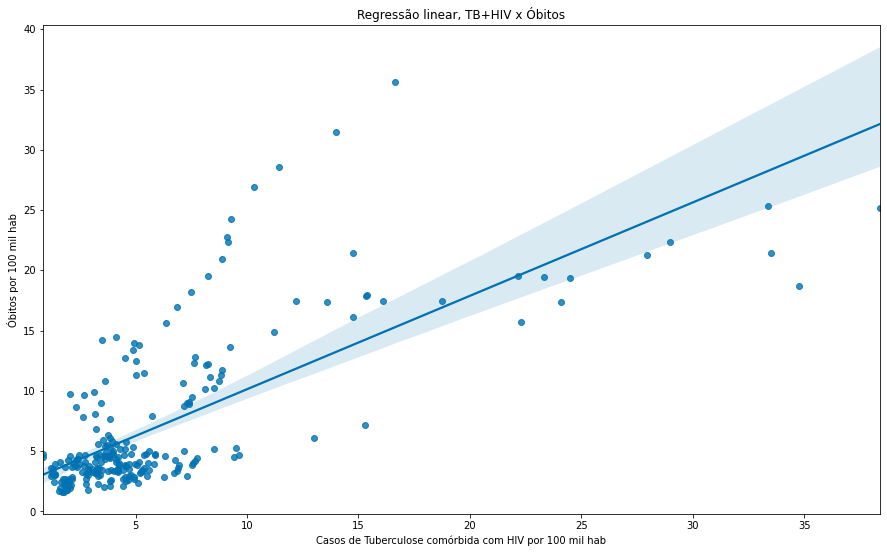

In [6]:
ax = sns.regplot(x='e_inc_tbhiv_num', y='e_mort_num', data=plot_data)
ax.set(xlabel='Casos de Tuberculose comórbida com HIV por 100 mil hab', ylabel='Óbitos por 100 mil hab')
plt.title('Regressão linear, TB+HIV x Óbitos')
plt.show()

Ao fazer uma regressão entre a quantidade de óbitos por 100 mil habitantes e a quantidade de casos de tuberculose comórbida com HIV, parece surgir uma grande correlação. Mas essa comparação tem um problema - pode ser que a quantidade de casos comórbidos sobe junto com a quantidade de casos.

In [14]:
plot_data = TB_SA[['e_inc_tbhiv_num', 'e_inc_num', 'e_mort_num', 'e_pop_num']].copy()

plot_data['e_inc_tbhiv_num'] = plot_data['e_inc_tbhiv_num']/plot_data['e_inc_num']*100
plot_data['e_mort_num'] = getDataByXHab(plot_data, 'e_mort_num')

X = plot_data['e_inc_tbhiv_num'].values.reshape(-1,1)
y = plot_data['e_mort_num'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lin_regr = linear_model.LinearRegression()
lin_regr.fit(X_train, y_train)

y_pred = lin_regr.predict(X_test)

print(f'Coefficient: {lin_regr.coef_[0][0]:.2f}')
print(f'Intercept: {lin_regr.intercept_[0]:.2f}')
print(f'Mean squared error: {mean_squared_error(y_test, y_pred):.2f}' )
print(f'R2: {r2_score(y_test, y_pred):.2f}')

     e_inc_tbhiv_num  e_inc_num  e_mort_num  e_pop_num
127        33.783784        740   21.434016     746477
128        21.951220        820   17.407256     746815
129        27.368421        950   18.723636     747718
130        28.089888        890   25.352601     749430
131        23.595506        890   21.275775     752029
132        30.851064        940   25.152637     755388
133        25.882353        850   22.389603     759281
134        25.000000        680   15.719748     763371
135        23.943662        710   19.545680     767433
136        25.000000        720   19.446097     771363
137        29.230769        650   19.349396     775218
180        21.818182        110    2.335734     470944
183        25.384615        130    4.303825     487938
184        25.833333        120    2.835845     493680
186        21.250000        160    3.166486     505292
187        21.875000        160    3.325632     511181
188        26.428571        140    5.027827     517122
189       

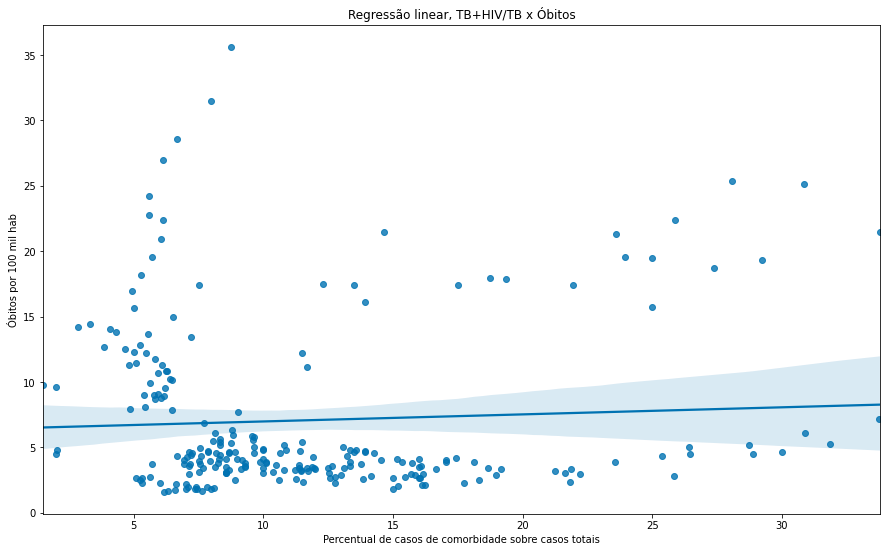

In [15]:
ax = sns.regplot(x='e_inc_tbhiv_num', y='e_mort_num', data=plot_data)
ax.set(xlabel='Percentual de casos de comorbidade sobre casos totais', ylabel='Óbitos por 100 mil hab')
plt.title('Regressão linear, TB+HIV/TB x Óbitos')
plt.show()

Aqui a regressão linear é entre óbitos por 100 mil habitantes e percentual de casos de comorbidade sobre os casos totais de tuberculose. Como podemos ver, mesmo quando o percentual de casos de tuberculose comórbidos com HIV crescem expressivamente, a tendêndica do número de óbitos tende a ser a mesma. Não há correlação, e a hipótese nula é invalidada.

### Intervalo de Confiança

In [9]:
def ic(df, column):
    data = df[column]
    mean = data.mean()
    std = data.std(ddof=1)
    se = std / np.sqrt(len(data))
    
    return (mean - 1.96 * se, mean + 1.96 * se)

In [18]:
ic_data = TB_SA[['e_inc_tbhiv_num', 'e_inc_num', 'e_mort_num', 'e_pop_num']].copy()

ic_data['e_inc_tbhiv_num'] = plot_data['e_inc_tbhiv_num']/plot_data['e_inc_num']*100

print(plot_data['e_inc_tbhiv_num'].mean())
ic(plot_data, 'e_inc_tbhiv_num')

11.561274820898626


(10.72240279754619, 12.400146844251063)

In [24]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

In [22]:
# Boostrap
def bootstrap_diff(df, column, n=5000):
    values = np.zeros(n)
    for i in range(n):
        sample = df[column].sample(len(df), replace=True)
        values[i] = sample.mean()
    return values

In [23]:
diff = bootstrap_diff(plot_data, 'e_inc_tbhiv_num')

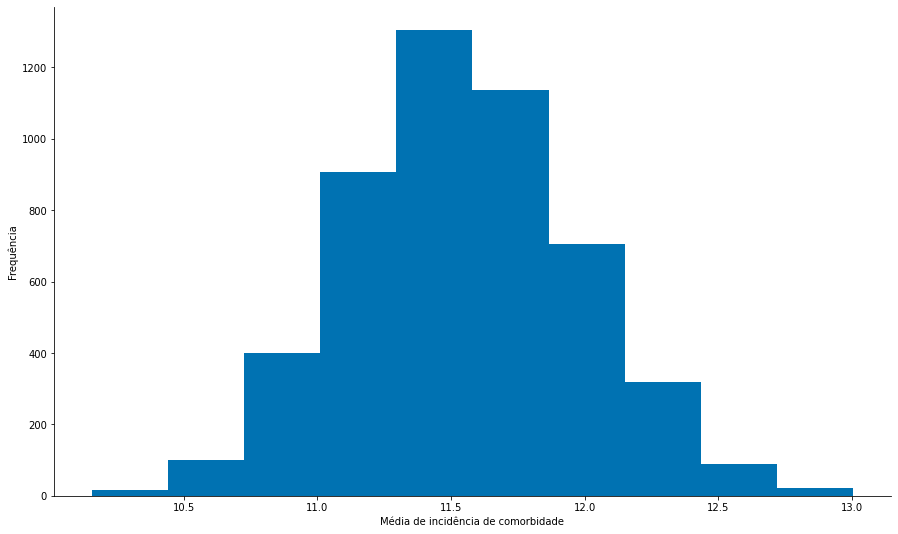

In [26]:
plt.hist(diff)
plt.xlabel('Média de incidência de comorbidade')
plt.ylabel('Frequência')
despine()